## Learn to Code for Data Analysis Week 4 Project

In this project I have been tasked to explore Comtrade data (http://comtrade.un.org/data/) for a commodity of my choice and consider the trade characteristics of the commodity including consideration of the following questions:

* Which are the regular exporters, i.e. which countries sell every month to the UK?
* Where could the export market be further developed, i.e. which countries import the least? Do the figures look realistic?
* What is the total amount of exports to and imports from the bi-lateral trade countries? Hint: pivot tables can have ‘marginal’ values.

My chosen commodity is cheese.

I will download the comtrade data for cheese (and it's sub-categories) and consider the above questions and other features of the data. As part of the project I wish to use learning from previous weeks. As such I intend to consider how to alter the trade value from US$ to GB£, to perform calculations across columns to work out net trade value and other manipulations if appropriate.

In [17]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

from pandas import *
%matplotlib inline

cheeseAll = read_csv('comtrade_cheese_2015_monthly.csv', dtype={'Commodity Code':str})

def cheeseType(code):
    if code == '0406': # Cheese and curd
        return 'All Cheese & Curd'
    if code == '040610': # fresh cheese, unfermented cheese, curd
        return 'Cheese, fresh and unfermented; Curd' 
    if code == '040620': # cheese, grated or powdered
        return 'Cheese, grated'
    if code == '040630': # processed cheese, not grated/powdered
        return 'Cheese, processed'
    if code == '040640': # blue cheese
        return 'Cheese, blue veined'
    if code == '040690': # other
        return 'Cheese, other'
    return 'unknown'

def usdToGBP (currency):
    return currency * 0.681

def monthName (code):
    if code == 201501:
        return 'January'
    if code == 201502:
        return 'February'
    if code == 201503:
        return 'March'
    if code == 201504:
        return 'April'
    if code == 201505:
        return 'May'
    if code == 201506:
        return 'June'
    if code == 201507:
        return 'July'
    if code == 201508:
        return 'August'
    if code == 201509:
        return 'September'
    if code == 201510:
        return 'October'
    if code == 201511:
        return 'November'
    return 'December'

COMMODITY = 'Cheese'
cheeseAll[COMMODITY] = cheeseAll['Commodity Code'].apply(cheeseType)
MONTH_CODE = 'Period'
MONTH = 'Period Desc.'
PARTNER = 'Partner'
FLOW = 'Trade Flow'
VALUE = 'Trade Value (US$)'
GBPVALUE = 'Trade Value (GB£)'
cheeseAll[GBPVALUE] = cheeseAll[VALUE].apply(usdToGBP).round()
headings = [MONTH_CODE, MONTH, PARTNER, FLOW, COMMODITY, GBPVALUE]
cheeseAll = cheeseAll[headings]
cheeseAll

Period   Period Desc.                           Partner Trade Flow  \
0     201501   January 2015                             World    Imports   
1     201501   January 2015                             World    Exports   
2     201501   January 2015                           Algeria    Exports   
3     201501   January 2015               Antigua and Barbuda    Exports   
4     201501   January 2015                         Australia    Exports   
5     201501   January 2015                           Austria    Imports   
6     201501   January 2015                           Austria    Exports   
7     201501   January 2015                           Bahrain    Exports   
8     201501   January 2015                          Barbados    Exports   
9     201501   January 2015                           Belgium    Imports   
10    201501   January 2015                           Belgium    Exports   
11    201501   January 2015                           Bermuda    Exports   
12    201501   January 2015                          Bulgaria    Imports   
13    201501   January 2015                          Bulgaria    Exports   
14    201501   January 2015                            Canada    Exports   
15    201501   January 2015                       Cayman Isds    Exports   
16    201501   January 2015                            Cyprus    Imports   
17    201501   January 2015                            Cyprus    Exports   
18    201501   January 2015                        Czech Rep.    Imports   
19    201501   January 2015                        Czech Rep.    Exports   
20    201501   January 2015                           Denmark    Imports   
21    201501   January 2015                           Denmark    Exports   
22    201501   January 2015                          Dominica    Exports   
23    201501   January 2015                           Estonia    Exports   
24    201501   January 2015                           Finland    Exports   
25    201501   January 2015                            France    Imports   
26    201501   January 2015                            France    Exports   
27    201501   January 2015                           Germany    Imports   
28    201501   January 2015                           Germany    Exports   
29    201501   January 2015                         Gibraltar    Exports   
...      ...            ...                               ...        ...   
4317  201512  December 2015                            Poland    Exports   
4318  201512  December 2015                          Portugal    Imports   
4319  201512  December 2015                          Portugal    Exports   
4320  201512  December 2015                             Qatar    Exports   
4321  201512  December 2015                           Romania    Imports   
4322  201512  December 2015                           Romania    Exports   
4323  201512  December 2015                       Saint Lucia    Exports   
4324  201512  December 2015  Saint Vincent and the Grenadines    Exports   
4325  201512  December 2015                      Saudi Arabia    Exports   
4326  201512  December 2015                             India    Exports   
4327  201512  December 2015                         Singapore    Exports   
4328  201512  December 2015                          Slovakia    Imports   
4329  201512  December 2015                          Slovakia    Exports   
4330  201512  December 2015                          Slovenia    Exports   
4331  201512  December 2015                      South Africa    Exports   
4332  201512  December 2015                          Zimbabwe    Exports   
4333  201512  December 2015                             Spain    Imports   
4334  201512  December 2015                             Spain    Exports   
4335  201512  December 2015                            Sweden    Imports   
4336  201512  December 2015                            Sweden    Exports   
4337  201512  December 2015                       Swit

In [18]:
cheeseCountries = cheeseAll[cheeseAll['Partner'] != 'World'] #This removes the 'world' data from the data set.
cheeseCountriesAll = cheeseCountries[cheeseCountries[COMMODITY] == 'All Cheese & Curd'] #This removes the sub-categories from the data set, leaving just the 'all cheese' figures.
cheeseCountriesSub = cheeseCountries[cheeseCountries[COMMODITY] != 'All Cheese & Curd'] #This removes the 'all cheese' data leaving just the sub-categories.


## Total trade flow
To answer the first question, 'how much does the UK export and import and is the balance positive (more exports than imports)?', the dataframe is split into two groups: exports from the UK and imports into the UK. The trade values within each group are summed up to get the total trading.

In [19]:
total = cheeseCountriesAll.groupby([FLOW])
total[GBPVALUE].aggregate(sum)

Trade Flow
Exports        461543718
Imports       1338598155
Name: Trade Value (GB£), dtype: float64

This shows that overall in 2015 there was a trade deficit of approximately £1.2 trillion. This can be further broken down by month using a pivot table.

In [20]:
cheeseMonthTable = pivot_table(cheeseCountriesAll,
                            index=[MONTH_CODE,MONTH],
                            columns = [FLOW],
                            values = GBPVALUE,
                            aggfunc=sum
                                    )
cheeseMonthTable

Trade Flow              Exports    Imports
Period Period Desc.                       
201501 January 2015    39252447   96728471
201502 February 2015   38559039  104949052
201503 March 2015      38529296  100465928
201504 April 2015      35693832  115056256
201505 May 2015        38677863  117455055
201506 June 2015       36701913  123561242
201507 July 2015       36250493  119701183
201508 August 2015     35758448  110184103
201509 September 2015  38988260  120149686
201510 October 2015    45117616  107399582
201511 November 2015   41466726  110086050
201512 December 2015   36547785  112861547

This table is plotted on a bar chart to show the differences visualy. This chart shows import and export values for all cheese and curd and suggests a peak in exports in October, and a peak in imports in June. It also clearly visualises the trade deficit each month.

In [21]:
cheeseMonthTable.plot(kind='bar',figsize=(12,8))

## Trade by type of cheese

Adding in the type of cheese to the columns enable comparison of the imports and exports by category.

In [22]:
cheeseCountriesSub

cheeseTypeMonthTable = pivot_table(cheeseCountriesSub,
                            index=[MONTH_CODE,MONTH],
                            columns = [COMMODITY,FLOW],
                            values = GBPVALUE,
                            aggfunc=sum
                                    )
cheeseTypeMonthTable

Cheese                Cheese, blue veined           \
Trade Flow                        Exports  Imports   
Period Period Desc.                                  
201501 January 2015                832059  1871433   
201502 February 2015              1400974  1758748   
201503 March 2015                 1193915  2062819   
201504 April 2015                 1086619  2182296   
201505 May 2015                   1151271  1840630   
201506 June 2015                   991273  2149562   
201507 July 2015                   854495  2038136   
201508 August 2015                 916321  1898690   
201509 September 2015             1733869  2736444   
201510 October 2015               2164042  2781737   
201511 November 2015              1852854  3407821   
201512 December 2015              1396345  3322301   

Cheese                Cheese, fresh and unfermented; Curd            \
Trade Flow                                        Exports   Imports   
Period Period Desc.                                                   
201501 January 2015                              10816220  27402798   
201502 February 2015                              9243673  26034868   
201503 March 2015                                 9696317  26691714   
201504 April 2015                                10835671  31434806   
201505 May 2015                                  12229018  29558854   
201506 June 2015                                 12096870  31472620   
201507 July 2015                                 12319670  30525252   
201508 August 2015                               11036128  28293687   
201509 September 2015                            11231424  28750986   
201510 October 2015                              11064308  29554995   
201511 November 2015                             10803356  29968452   
201512 December 2015                             10844886  28421239   

Cheese                Cheese, grated          Cheese, other            \
Trade Flow                   Exports  Imports       Exports   Imports   
Period Period Desc.                                                     
201501 January 2015           995000  3543671      22898475  48187942   
201502 February 2015          999671  3678540      23082371  54586862   
201503 March 2015            1220669  4029509      22190112  51012525   
201504 April 2015            1134982  4232634      20712317  61899137   
201505 May 2015              1171930  3652571      22129735  67572046   
201506 June 2015             1060481  4913498      20386527  67403517   
201507 July 2015              962102  3580011      20065369  67090008   
201508 August 2015           1158763  3883057      20479861  60025875   
201509 September 2015         979003  4134593      23292209  65081139   
201510 October 2015          1023178  2986521      28907758  55356764   
201511 November 2015          863921  3731521      25283088  56698476   
201512 December 2015         1043163  2732197      21163887  60776395   

Cheese                Cheese, processed            
Trade Flow                      Exports   Imports  
Period Period Desc.                                
201501 January 2015             3710693  15722621  
201502 February 2015            3832352  18890036  
201503 March 2015               4228285  16669365  
201504 April 2015               1924246  15307380  
201505 May 2015                 1995906  14830956  
201506 June 2015                2166764  17622046  
201507 July 2015                2048850  16467779  
201508 August 2015              2167380  16082795  
201509 September 2015           1751749  19446527  
201510 October 2015             1958336  16719563  
201511 November 2015            2663510  16279782  
201512 December 2015            2099501  17609412

In [34]:
cheeseTypeMonthTable.plot(kind='bar',figsize=(28,15))

## Trade by country

Modifying the code allows visualisation of imports and exports for all cheese by country, and identifies a list of 98 countries. Most seem to be countries to which the UK has exported or imported small amounts of cheese.

In [27]:
cheeseCountriesTable = pivot_table(cheeseCountriesAll,
                            index=[PARTNER],
                            columns=[FLOW],
                            values=GBPVALUE,
                            aggfunc=sum
                                    )
cheeseCountriesTable

Trade Flow                         Exports    Imports
Partner                                              
Albania                             806070        NaN
Algeria                            1729596        NaN
American Samoa                         937        NaN
Anguilla                            119672        NaN
Antigua and Barbuda                 506240        NaN
Areas, nes                           53792        NaN
Australia                          4865102      11080
Austria                            1388624   12353406
Bahrain                             259558        NaN
Barbados                           1412257        NaN
Belgium                            4884936   81639546
Bermuda                             172413        NaN
Bosnia Herzegovina                    3830        NaN
Brazil                              199657        NaN
Brunei Darussalam                     1623        NaN
Bulgaria                           1148073    2256362
Canada                             7817822    2529078
Cayman Isds                          50581        NaN
China                               204945        NaN
China, Hong Kong SAR               1588415        NaN
Croatia                             164253        NaN
Cyprus                             3301092   32001137
Czech Rep.                         2594402    4530112
Denmark                           14569651  101934526
Dominica                            352380        NaN
Dominican Rep.                      598759        NaN
Egypt                              2955652        NaN
Equatorial Guinea                     1569        NaN
Estonia                              57644        NaN
Falkland Isds (Malvinas)             34815        NaN
...                                    ...        ...
Peru                                166708        NaN
Philippines                         227543        NaN
Poland                             4098234   18934075
Portugal                           3126621     630707
Qatar                               229430        NaN
Rep. of Korea                       274181        NaN
Romania                             769401    1603405
Saint Helena                         69456        NaN
Saint Kitts and Nevis               266240        NaN
Saint Lucia                        1226569        NaN
Saint Vincent and the Grenadines    568359        NaN
Saudi Arabia                       6688972        NaN
Singapore                          1158236        NaN
Slovakia                            655933   11950685
Slovenia                             43534        NaN
South Africa                       5365187        NaN
Spain                             15767583   12532300
Sri Lanka                            42828        NaN
Sweden                             9136694    2398027
Switzerland                        1486833    5159696
Thailand                            227659        NaN
Trinidad and Tobago                 612747        NaN
Turkey                              227158      18488
Uganda                               12584        NaN
United Arab Emirates               7964873        NaN
United Kingdom                         NaN     103588
United Rep. of Tanzania              30275        NaN
United States of America          52803631     148735
Uruguay                             102084        NaN
Zimbabwe                              1023        NaN

[98 rows x 2 columns]

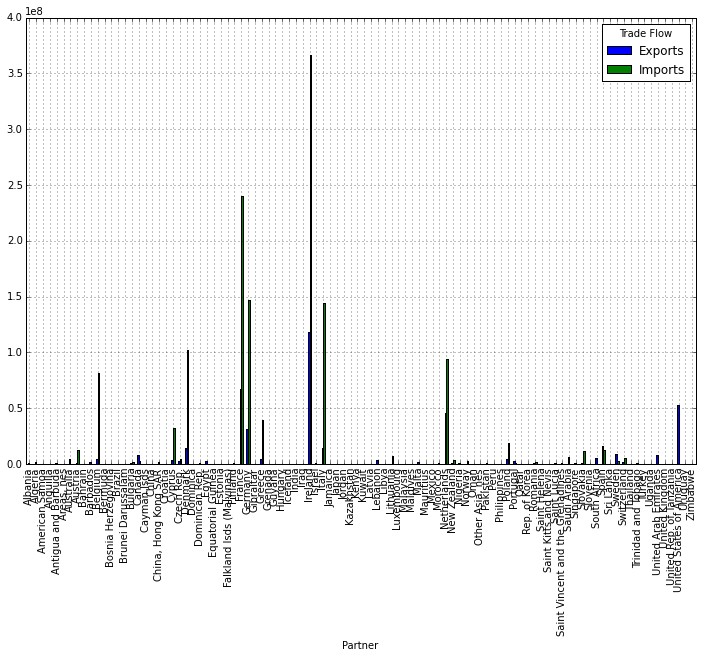

In [29]:
cheeseCountriesTable.plot(kind='bar',figsize=(12,8))

Modifying the list to show only Partners for which the trade value is more than £2.5million will identify major trading partners.

In [55]:
def tradeMoreThan100K(trade):
    return sum(trade[GBPVALUE]) > 2500000

cheeseCountriesAllMain = cheeseCountriesAll.groupby(PARTNER).filter(tradeMoreThan100K).sort(FLOW, ascending=False)
cheeseCountriesMainTable = pivot_table(cheeseCountriesAllMain,
                            index=[PARTNER],
                            columns=[FLOW],
                            values=GBPVALUE,
                            aggfunc=sum
                                    )
cheeseCountriesMainTable

Trade Flow                  Exports    Imports
Partner                                       
Australia                   4865102      11080
Austria                     1388624   12353406
Belgium                     4884936   81639546
Bulgaria                    1148073    2256362
Canada                      7817822    2529078
Cyprus                      3301092   32001137
Czech Rep.                  2594402    4530112
Denmark                    14569651  101934526
Egypt                       2955652        NaN
France                     66944237  240301278
Germany                    31585401  147313367
Greece                      4397798   39398767
Ireland                   118767399  366942348
Italy                      14199566  144666915
Lebanon                     3238071        NaN
Lithuania                    256718    7137164
Netherlands                46003980   94448968
New Zealand                  748421    3969407
Norway                       471021    3116063
Poland                      4098234   18934075
Portugal                    3126621     630707
Saudi Arabia                6688972        NaN
Slovakia                     655933   11950685
South Africa                5365187        NaN
Spain                      15767583   12532300
Sweden                      9136694    2398027
Switzerland                 1486833    5159696
United Arab Emirates        7964873        NaN
United States of America   52803631     148735

In [44]:
cheeseCountriesMainTable.plot(kind='bar',figsize=(12,8))

This chart identifies the UK's main trading partners (as defined by a total trade value (import and export) of more than £2.5 million. It shows that largely the UK imports from all countries more than it exports, and that the countries with the highest trade value are Ireland, France, Germany, Italy and Germany respectively. One curiosity is the USA, where the UK exported a large value of cheese without significant imports. This is explored further below.

In [51]:
cheeseCountryAllUSA= cheeseCountriesAll[cheeseCountries[PARTNER]=="United States of America"]
cheeseCountryAllUSATable = pivot_table(cheeseCountryAllUSA,
                            index=[MONTH_CODE,MONTH],
                            columns = [COMMODITY,FLOW],
                            values = GBPVALUE,
                            aggfunc=sum
                                    )
cheeseCountryAllUSATable

/usr/lib/python3/dist-packages/pandas/core/frame.py:1771: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


Cheese                All Cheese & Curd        
Trade Flow                      Exports Imports
Period Period Desc.                            
201501 January 2015             5388555     NaN
201502 February 2015            3436778     NaN
201503 March 2015               3159421    5742
201504 April 2015               3932072    7347
201505 May 2015                 3463383    7932
201506 June 2015                3689150   30012
201507 July 2015                4269074   68991
201508 August 2015              3660165    4181
201509 September 2015           5593932    6369
201510 October 2015             7888504   10764
201511 November 2015            4531798    7397
201512 December 2015            3790799     NaN

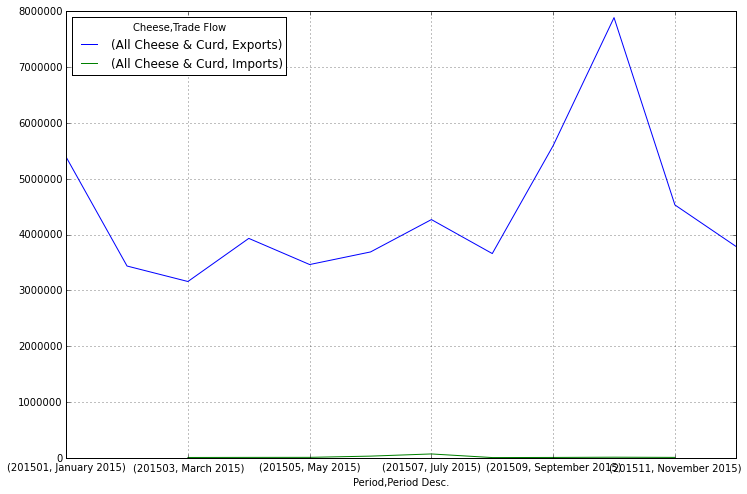

In [60]:
cheeseCountryAllUSATable.plot(figsize=(12,8))

This shows a peak in exports of all cheese around October, and a second smaller peak in January. This does not, however, give an indication of any pattern in the type of cheese exported. 

In [68]:
cheeseCountrySubUSA= cheeseCountriesSub[cheeseCountries[PARTNER]=="United States of America"].reset_index()
cheeseCountrySubUSAExports= cheeseCountriesSub[cheeseCountries[FLOW]=="Exports"].reset_index()
cheeseCountryUSASubExportsTable = pivot_table(cheeseCountrySubUSAExports,
                            index=[MONTH_CODE,MONTH],
                            columns = [COMMODITY,FLOW],
                            values = GBPVALUE,
                            aggfunc=sum
                                    )
cheeseCountryUSASubExportsTable

/usr/lib/python3/dist-packages/pandas/core/frame.py:1771: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


Cheese                Cheese, blue veined Cheese, fresh and unfermented; Curd  \
Trade Flow                        Exports                             Exports   
Period Period Desc.                                                             
201501 January 2015                832059                            10816220   
201502 February 2015              1400974                             9243673   
201503 March 2015                 1193915                             9696317   
201504 April 2015                 1086619                            10835671   
201505 May 2015                   1151271                            12229018   
201506 June 2015                   991273                            12096870   
201507 July 2015                   854495                            12319670   
201508 August 2015                 916321                            11036128   
201509 September 2015             1733869                            11231424   
201510 October 2015               2164042                            11064308   
201511 November 2015              1852854                            10803356   
201512 December 2015              1396345                            10844886   

Cheese                Cheese, grated Cheese, other Cheese, processed  
Trade Flow                   Exports       Exports           Exports  
Period Period Desc.                                                   
201501 January 2015           995000      22898475           3710693  
201502 February 2015          999671      23082371           3832352  
201503 March 2015            1220669      22190112           4228285  
201504 April 2015            1134982      20712317           1924246  
201505 May 2015              1171930      22129735           1995906  
201506 June 2015             1060481      20386527           2166764  
201507 July 2015              962102      20065369           2048850  
201508 August 2015           1158763      20479861           2167380  
201509 September 2015         979003      23292209           1751749  
201510 October 2015          1023178      28907758           1958336  
201511 November 2015          863921      25283088           2663510  
201512 December 2015         1043163      21163887           2099501

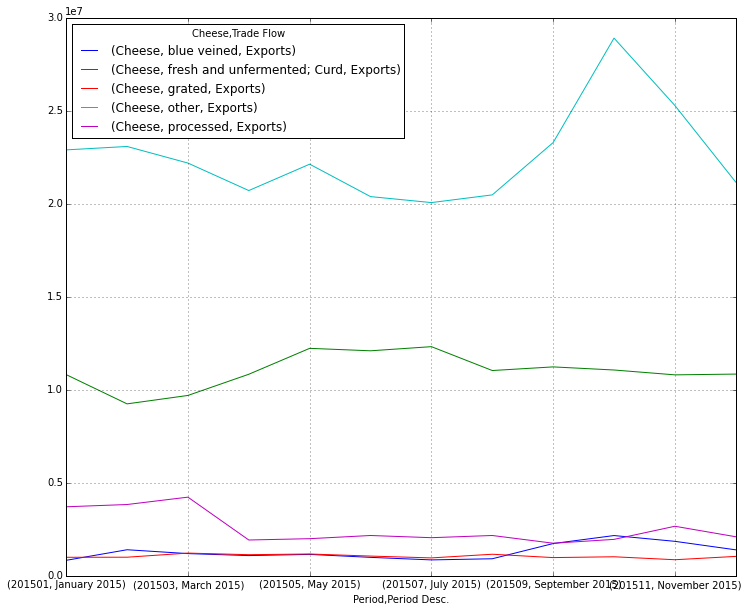

In [67]:
cheeseCountryUSASubExportsTable.plot(figsize=(12,10))

This information reveals that the October peak in exports of cheese to the USA is due to the 'Cheese, other' category, and that the likely cause of the January peak is processed cheese.

## Conclusion

The UK has a relatively high trade activity in cheese, both imports and exports. Most countries with which the UK trades cheese have both imports and exports, although the UK imports a higher value of cheese than it exports (£1.3 trillion vs £0.4 trillion). The countries with which the UK partakes most trade in cheese are Ireland, France, Germany, Italy and Germany. There was one country whose main trade relationship was exports of UK cheese, the United States of America, who imported UK cheese at a generaly level, with a peak import of 'other cheese' in October 2015.